In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

from sklearn.ensemble import RandomForestClassifier

In [36]:
df_train = pd.read_csv('../data/clean_train.csv')

df_test = pd.read_csv('../data/clean_test.csv')

df_dict = pd.read_excel('../data/Data Dictionary.xlsx')

In [37]:
df_train

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,...,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default,employment_self,employment_none,age_at_disbursal,average_acct_age_months,credit_history_length_months,cns_score_category,cns_score_unreliable
0,420825,50578,58400,89.55,67,22807,45,1441,6,1998,...,0,0,0,0,0,34,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,6,1998,...,1,0,1,1,0,33,23,23,9,0
2,417566,53278,61360,89.63,67,22807,45,1497,6,1998,...,0,0,0,1,0,33,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,6,1998,...,0,1,1,1,0,25,8,15,12,0
4,539055,52378,60300,88.39,67,22807,45,1495,6,1998,...,0,1,1,1,0,41,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,6,3705,...,0,0,0,0,0,30,21,39,4,0
233150,606141,73651,100600,74.95,34,23775,51,990,6,3705,...,0,0,0,1,0,30,6,6,1,0
233151,613658,33484,71212,48.45,77,22186,86,2299,4,3479,...,0,0,0,0,0,42,0,0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,4,3479,...,0,0,0,0,0,24,0,0,0,0


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


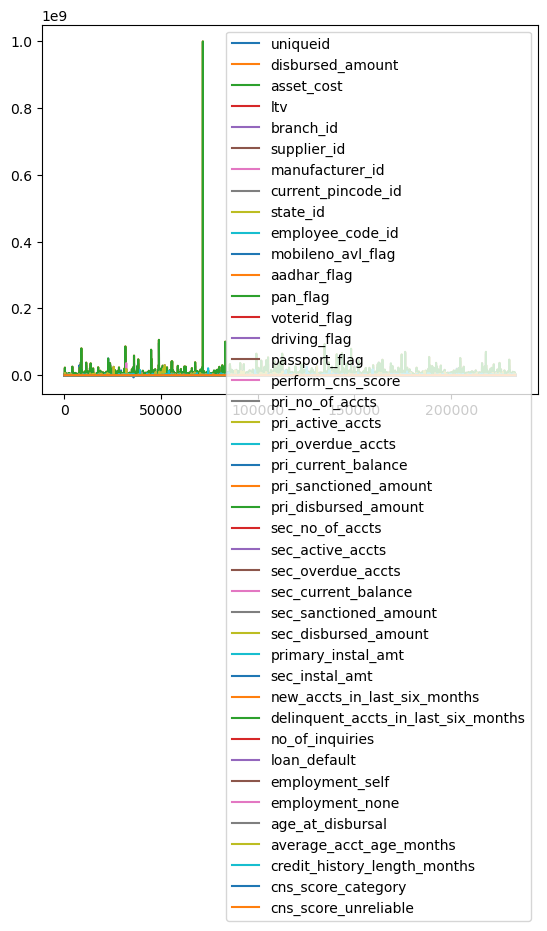

In [60]:
for i in df_train.columns:
    plt.plot(df_train[i], label = i)
    plt.legend();

In [47]:
df_train.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id',
       'employee_code_id', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag',
       'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score',
       'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'no_of_inquiries',
       'loan_default', 'employment_self', 'employment_none',
       'age_at_disbursal', 'average_acct_age_months',
       'credit_history_length_months', 'cns_score_category',
       'cns_score_unreliable'],
      dtype='object')

In [48]:
X = df_train[['disbursed_amount', 'asset_cost', 'ltv',
             'pri_overdue_accts', 'sec_overdue_accts', 'age_at_disbursal',
            'delinquent_accts_in_last_six_months',
             'employment_self', 'employment_none',
               'cns_score_category', 'cns_score_unreliable']]

In [49]:
y = df_train['loan_default']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [56]:
logr = LogisticRegression()

In [52]:
logr.fit(X_train, y_train)

LogisticRegression()

In [53]:
cross_val_score(logr, X_train, y_train).mean()

0.7827352529093872

In [54]:
logr.score(X_train, y_train), logr.score(X_test, y_test)

(0.7827524090012296, 0.7827720496148501)

In [55]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(0.9992222571698167, 0.768361097291084)

In [10]:
for i in df_train.columns:
    print(df_train[i].head())

0    420825
1    537409
2    417566
3    624493
4    539055
Name: uniqueid, dtype: int64
0    50578
1    47145
2    53278
3    57513
4    52378
Name: disbursed_amount, dtype: int64
0    58400
1    65550
2    61360
3    66113
4    60300
Name: asset_cost, dtype: int64
0    89.55
1    73.23
2    89.63
3    88.48
4    88.39
Name: ltv, dtype: float64
0    67
1    67
2    67
3    67
4    67
Name: branch_id, dtype: int64
0    22807
1    22807
2    22807
3    22807
4    22807
Name: supplier_id, dtype: int64
0    45
1    45
2    45
3    45
4    45
Name: manufacturer_id, dtype: int64
0    1441
1    1502
2    1497
3    1501
4    1495
Name: current_pincode_id, dtype: int64
0    1984-01-01
1    1985-07-31
2    1985-08-24
3    1993-12-30
4    1977-12-09
Name: date_of_birth, dtype: object
0    2018-08-03
1    2018-09-26
2    2018-08-01
3    2018-10-26
4    2018-09-26
Name: disbursal_date, dtype: object
0    6
1    6
2    6
3    6
4    6
Name: state_id, dtype: int64
0    1998
1    1998
2    1998
3    

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'disbursal_date', 'state_id', 'employee_code_id', 'mobileno_avl_flag',
       'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag',
       'passport_flag', 'perform_cns_score', 'pri_no_of_accts',
       'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance',
       'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts',
       'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance',
       'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt',
       'sec_instal_amt', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'no_of_inquiries',
       'loan_default', 'employment_self', 'employment_none',
       'average_acct_age_months', 'credit_history_length_months',
       'cns_score_category', 'cns_score_unreliable'],
      dtype='object')